# "Chill Havana" Project
### Análisis de Bares y Restaurantes en La Habana

Un día como cualquiera salía un grupo de jóvenes de su escuela con ganas de pasar un rato chill con los colegas, algo para picar y una musiquita de fondo. Ya todos habían dado el sí cuando alguien soltó la misma pregunta de siempre: Loco, ¿pero a dónde vamos? Nada, que esa era la pregunta que casi siempre cortaba todo el rollo. Buscar el sitio ideal para las vibes del momento era bastante complicado, en ningún sitio ponían toda la info necesaria. 

-"Tú busca en MenúCuba, ella en Instagram y yo la dirección en Maps, y ojalá salga todo!"

¿Nunca has sentido tremendo agobio de escoger a qué lugar salir? Pues ellos sí y decidieron que era la última vez. ¿Qué es lo más importante para ti a la hora de elegir? ¿La variedad del menú? ¿Un plato específico? ¿La ubicación? ¿La valoración de otras personas? 
Nada, que tú puedes elegir lo que quieras porque para eso aquella tarde nació el proyecto "Chill Havana".

Al final, después de tanto debate, ese día no salieron, se quedaron pensando y organizando sus ideas. Sí, sí, ellos se tomaron el problema como algo personal, pero tranqui, tenían su arma secreta: el amiguito del grupo que le sabía a la tecnología. Estaba clarísimo, querían hacer una página web que tuviera datos sobre más de 200 bares y restaurantes de La Habana para que cualquiera que quisiera elegir un lugar pudiera encontrar allí todo lo necesario para decidirse por el más adecuado para la ocasión.
Oye, que el proyecto era tremenda idea eh. ¿Cómo crees que cambiaría las cosas tener un sitio web tan guay?

In [19]:
#Crear el dataframe con los json para el trabajo con las bibliotecas de Python
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def crear_data_frame():
    ruta = "C:/Users/andre/Desktop/Chill_Havana_Project/Jsons"
    data = []
    for archivo in glob.glob(ruta + "/*.json"):
        with open(archivo, 'r', encoding='utf-8') as f:
            contenido = json.load(f)
            data.append(contenido)
            
    df = pd.DataFrame(data)
    return df

df = crear_data_frame()
#print(df['name'])

El grupo seleccionó tres municipios cabecera por ser los más frecuentados por ellos y por muchos habaneros: Plaza de la Revolución, Playa y Centro Habana, de estos tres analizaron 30 establecimientos y del resto solo 10. Todos estos fueron clasificados en "bar", "restaurante" o "bar - restaurante", notando que de los establecimientos estudiados predominaban los restaurantes.

In [69]:
# Contar los tipos de establecimientos
tipo_establecimientos = df['type_of_establishment'].value_counts().reset_index()
tipo_establecimientos.columns = ['Tipo de Establecimiento', 'Cantidad']

fig = px.pie(tipo_establecimientos, 
            values='Cantidad', 
            names='Tipo de Establecimiento', 
            title='Porcentaje de Tipos de Establecimientos en La Habana',
            hole=0.1)
fig.show()

-"Una de las cosas que más me influye a la hora de seleccionar el sitio ideal es su ubicación exacta, casi siempre tienen su dirección pero muchas veces no conozco esas calles y me paso y buen rato tratando de ubicarlas en el mapa. Personalmente creo que sería genial si nuestra web tuviera ya todos los establecimientos perfectamente localizados y fácil de visualizar sus puntos de referencia."

-"Exaaacto! Además sería super sencillo ver qué otros lugares quedan cerca. ¿Quién sabe? Quizás después se te antoja un heladito o sentarte en el malecón."

In [70]:
mapa = folium.Map(location=[23.1136, -82.3666], zoom_start=12)  # Coordenadas de La Habana

for index, row in df.iterrows():
    latitude = row['coordinates']['latitude']
    longitude = row['coordinates']['longitude']
    name = row['name']
    
    folium.Marker(
        location=[latitude, longitude],
        popup=name,
        icon=folium.Icon(color='darkblue')
    ).add_to(mapa)

mapa

Uno de los aspectos que consideraron de mayor importancia, principalmente para los más jóvenes, fue el análisis sobre cuántos establecimientos de los estudiados poseían redes sociales como Instagram y Facebook que, por lo general, influye en la popularidad del mismo.

-"Sí, sí, que tenga redes es super importante, ahí suben fotos del local, de los platos y más o menos vas teniendo una idea. Para mí que tenga actividad en las plataformas digitales es muy buena señal. Hay que modernizarse."

In [72]:
#Ver la cantidad de establecimientos por municipio que tiene Instagram y Facebook.
def social_networks(contact):
    return bool(contact.get('instagram')) and bool(contact.get('facebook'))

df['has_social_net'] = df['contact'].apply(social_networks)

df_social_net = df[df['has_social_net']]

mun_count = df_social_net['district'].value_counts().reset_index()
mun_count.columns = ['Municipio', 'Cantidad']

fig = px.bar(mun_count, 
            x='Municipio', 
            y='Cantidad', 
            title='Cantidad de Restaurantes con Redes Sociales por Municipio',
            labels={'Cantidad': 'Cantidad de Restaurantes', 'Municipio': 'Municipio'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Plasma)  # Cambiado a 'Greens'

fig.update_layout(xaxis_tickangle=-45)  # Rotar las etiquetas del eje x
fig.show()

EL hecho de que algo le guste a muchas personas no implica necesariamente que te vaya a gustar a tí, pero tener referencias nunca está de más, por eso otro aspecto influyente que consideraron es la valoración del público. Se decidió analizar el rating de TripAdvisor para determinar cuáles eran los 20 mejores valorados y los 20 peores.

C:\Users\andre\AppData\Local\Temp\ipykernel_5764\2359392062.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





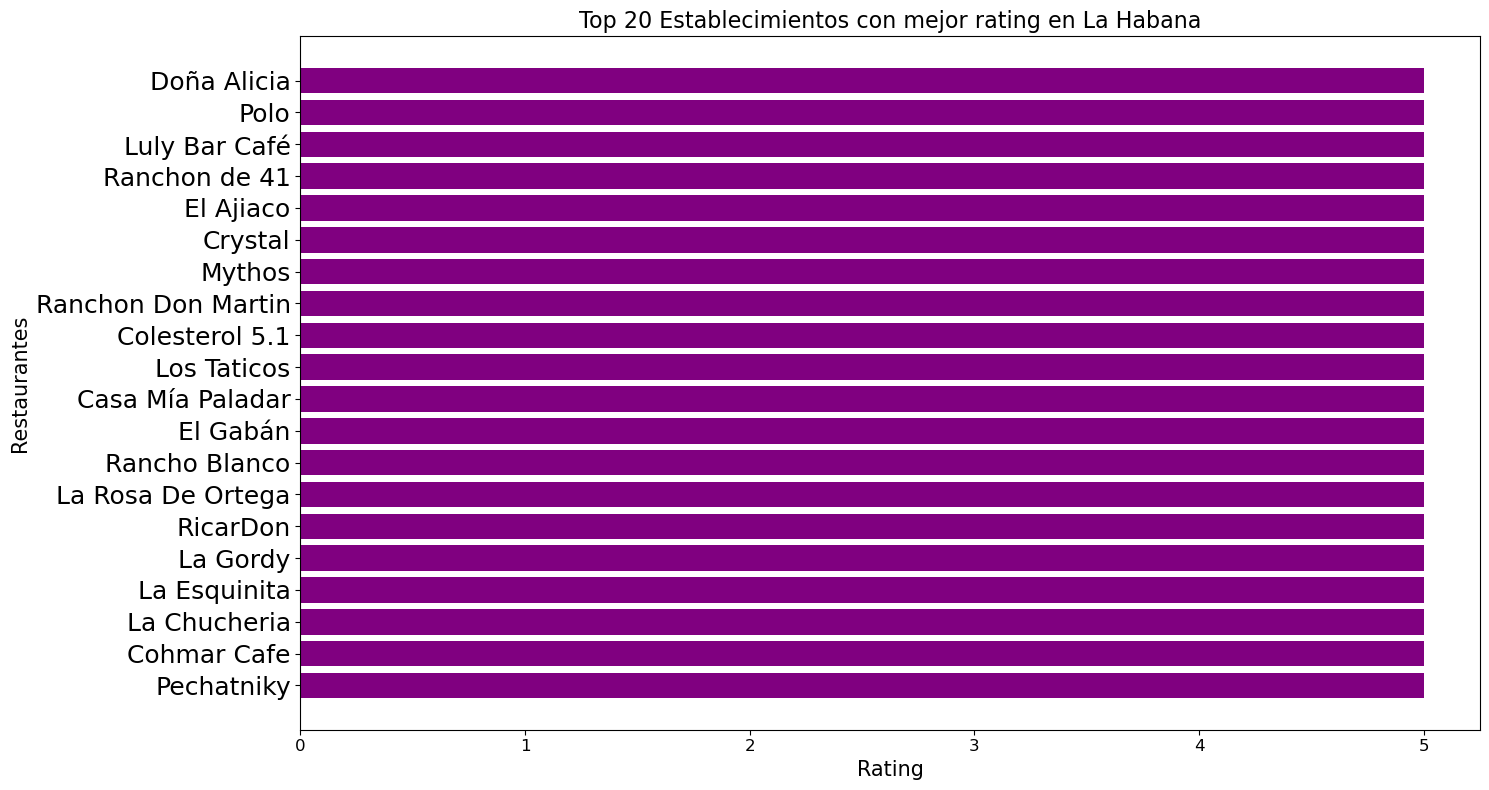

In [150]:
df_copy = df.copy() # Crea una copia del df
df_copy['rating'].fillna(0, inplace=True)  # Alternativa más segura
#df[df["rating"].isna()]=0 #Hace cero los que tiene un rating "null"
df_valid_ratings = df_copy.sort_values(by='rating', ascending=False).head(20) #Ordena de mayor a menor y solo deja los 20 mejores

plt.figure(figsize=(15, 8))
plt.barh(df_valid_ratings['name'], df_valid_ratings['rating'], color='purple')
plt.title('Top 20 Establecimientos con mejor rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Restaurantes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

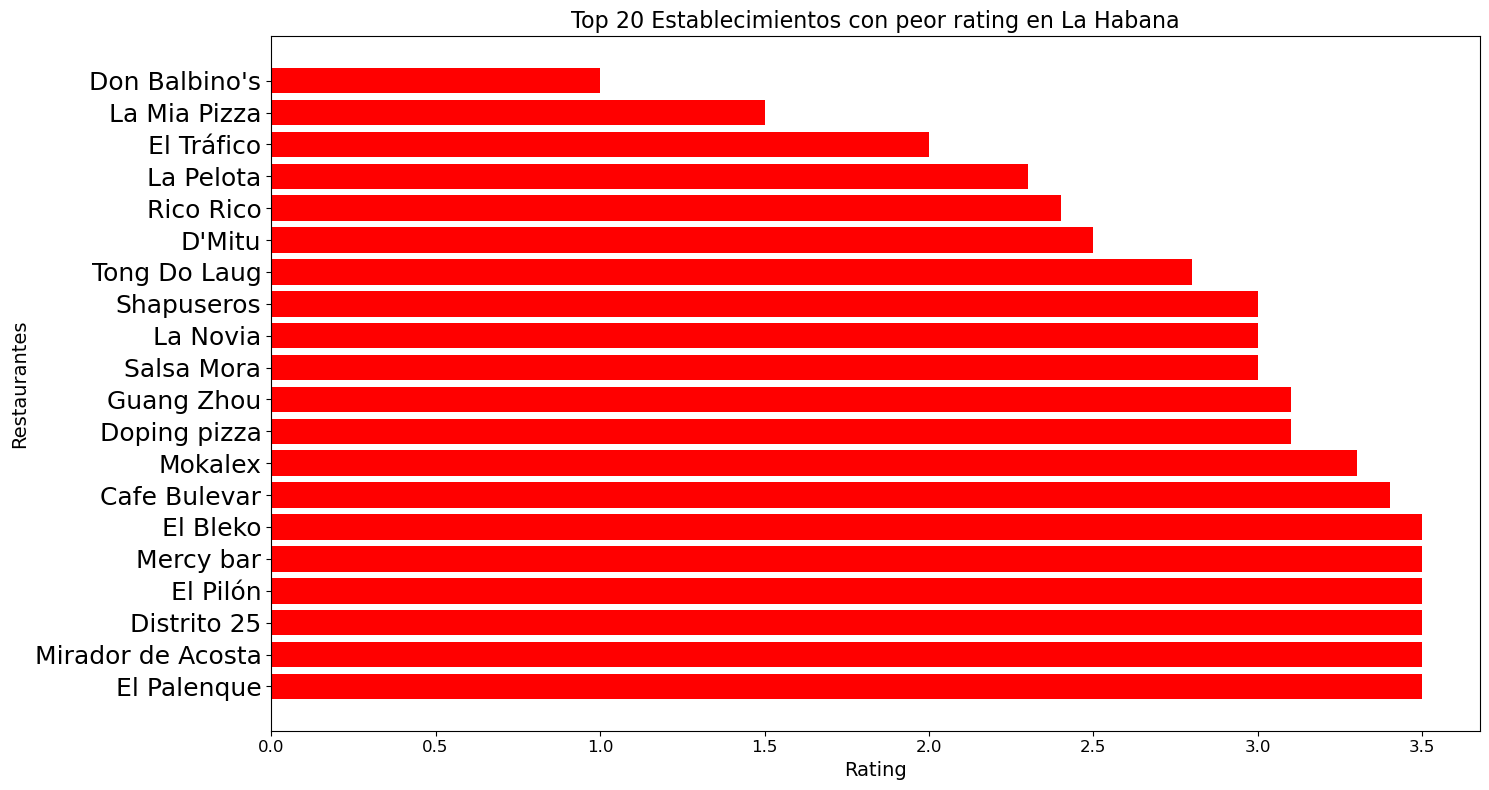

In [151]:
df_sorted_values = df.sort_values(by='rating', ascending=False).tail(51) #Ordena de mayor a menor y escoge las ultimas 51 lineas.
veinte_peores = df_sorted_values.iloc[:20,:] #Se queda con las 20 primeras, las otras 31 son 0.

plt.figure(figsize=(15, 8)) 
plt.barh(veinte_peores['name'], veinte_peores['rating'], color='red')
plt.title('Top 20 Establecimientos con peor rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Restaurantes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout() 
plt.show()

¿Eres más de comida tradicional o te gusta probar cosas nuevas todo el rato? Se sabe que la mayoría de los establecimientos ofrece comida criolla, cubana, pero después de esa ¿cuál es el tipo de comida que se oferta en mayor cantidad sitios?

In [124]:
cocina = df['cuisine'].explode()  # Separa cada elemento de las listas

conteo_cocina = cocina.value_counts().reset_index()
conteo_cocina.columns = ['Tipo de Cocina', 'Cantidad']

fig = px.bar(conteo_cocina, 
            x='Tipo de Cocina', 
            y='Cantidad', 
            title='Cantidad de Establecimientos por Tipo de Cocina',
            labels={'Cantidad': 'Cantidad de Establecimientos', 'Tipo de Cocina': 'Tipo de Cocina'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(xaxis_tickangle=-45) # Rotar las etiquetas de x

fig.show()

-Yo sabía que Italia iba a salir por algún lado, si al cubano todo lo que tenga queso y puré le gusta, pero yo soy más de cambiar, ¡qué aburrido comer lo mismo siempre! ¿Habrá lugares que ofrezcan comidas únicas, algo fuera de lo común? ¿Tú crees que a la gente le guste bastante ese estilo un poco más exótico?

In [125]:
cocina = df['cuisine'].explode()

count_cocina = cocina.value_counts().reset_index() # Cuenta cuantas veces aparece cada tipo de cocina
count_cocina.columns = ['Tipo de Cocina', 'Cantidad']

tipos_unicos = count_cocina[count_cocina['Cantidad'] == 1]['Tipo de Cocina'] # Se queda con los q solo salen una vez

def tiene_tipo_unico(cuisine_list): # Función para ver si un lugar tiene tipos únicos
    if isinstance(cuisine_list, list):  # Ver si es una lista
        return any(tipo in tipos_unicos.values for tipo in cuisine_list) # Devuelve True si hay algun tipo de cocina unico
    return False  # Si no es una lista

restaurantes_unicos = df[df['cuisine'].apply(tiene_tipo_unico)] # Del df original se queda con los lugares con tipos únicos
restaurantes_info = restaurantes_unicos[['name', 'rating', 'cuisine']]

def obtener_tipo_unico(cuisine_list): # Crear una columna con el tipo de cocina único
    for tipo in cuisine_list:
        if tipo in tipos_unicos.values:
            return tipo
    return None

restaurantes_info['Tipo de Cocina Único'] = restaurantes_info['cuisine'].apply(obtener_tipo_unico)

fig = px.bar(restaurantes_info, 
            x='name', 
            y='rating', 
            title='Ratings de Restaurantes con Tipos de Cocina Únicos',
            labels={'rating': 'Rating', 'name': 'Nombre del Restaurante'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Plasma,
            hover_data={'Tipo de Cocina Único': True})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_5764\63888567.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



También vieron relevante el análisis de la capacidad de los bares y restaurantes. Hay lugares muy pequeños que no son cómodos si vas con grupos grandes o tal vez quieres un lugar un poco más pequeños y tranquilos. ¿Cuál será la capacidad más frecuente? ¿Y si además tomamos en cuenta los municipios?

In [152]:
df1 = df[df['intake_capacity'].isin(capacidades)]
conteo_intake_capacity = df1['intake_capacity'].value_counts().reset_index()
conteo_intake_capacity.columns = ['Capacidad de Recepción', 'Cantidad']

fig = px.pie(conteo_intake_capacity, 
            names='Capacidad de Recepción', 
            values='Cantidad', 
            title='Distribución de Establecimientos por Capacidad de Recepción',
            color='Capacidad de Recepción',
            color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

In [162]:
conteo_por_municipio = df_filtrado.groupby(['district', 'intake_capacity']).size().reset_index(name='count') #Agrupa por tipo de capacidad y el municipio y cuenta. El (name='count') le da nombre a la nueva columa con los conteos.

fig = px.bar(conteo_por_municipio, 
            x='district', 
            y='count', 
            color='intake_capacity', 
            barmode='group',
            title='Cantidad de Establecimientos por Municipio y Capacidad',
            labels={'district': 'Municipio', 'count': 'Número de Establecimientos'},
            text='count')
fig.show()

-Saber los mejores y peores está bien, así lo puedes tener en cuenta para cada ocasión, pero ¿no crees que siempre es necesario conocer el punto medio? No sé, no quiero visitar los peores restaurantes pero los mejor valorados no son necesariamente los más accesibles para todos. ¿Cuáles serán de esos lugares aquellos que tienen una calificación aceptable?

In [3]:
df[df["rating"].isna()]=0 #Hace cero los que tiene un rating "null"
df_valid_ratings_to_median = df.sort_values(by='rating', ascending=False) #Ordena los rating de mayor a menor
a = df_valid_ratings_to_median.iloc[:-31,:] #Quita los ultimos 31, son los de rating "null" que hicimos 0.
most_access = a[(a['rating'] >= 3.0) & (a['rating'] <= 4.0)].copy(deep = True) #Deja solo los que tengan rating dentro del intervalo indicado
#print(most_access)
fig = px.bar(most_access, 
            x='name', 
            y='rating', 
            title='Establecimientos con Rating entre 3.0 y 4.0',
            labels={'name': 'Nombres de los establecimientos', 'rating': 'Rating'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(xaxis_tickangle=-70) 
fig.show()

Un lugar que brinde servicio las 24 horas es definitivamente un fiel compi cuando son las 3am y ya sea por trabajo, una emergencia o cosas de la vida, no estás en casa para atacar tu refrigerador a tu disposición. Claro que nuestros héroes adolescentes también pensaron en ello y decidieron ver con qué lugares podían contar para situaciones de ese tipo.

In [161]:
opened_24h = []
for index, row in df.iterrows():  # Itera sobre cada fila del df
    nombre_restaurante = row['name']
    horario = row['schedule'] 
    
    if not isinstance(horario, dict):  # Verifica que sea un diccionario
        continue 
    
    abierto_24 = True 
    for dia in horario:
        if isinstance(horario[dia], dict): 
            if 'open' in horario[dia] and 'close' in horario[dia]:
                if horario[dia]['open'] != '0000' or horario[dia]['close'] != '2400':
                    abierto_24 = False 
                    break
            else:
                abierto_24 = False
                break
        else:
            abierto_24 = False
            break
        
    if abierto_24:
        opened_24h.append(nombre_restaurante)
        
if opened_24h:
    print("Restaurantes abiertos las 24 horas:")
    for restaurante in opened_24h:
        print(restaurante)

Restaurantes abiertos las 24 horas:
Bocattas
Pechatniky
Qbanas 60
Qué chévere
Ranchon de 41
Sport Bar


In [52]:
def check_name_price(aux, plato, price): #funcion que chequea el precio y nombre
    for i in aux:
        if i != "drinks" and i != "special_offers":
            if aux[i]:
                for j in aux[i]["items"]:
                    if (
                        j["name"].lower().strip().find(plato.lower().strip()) != -1
                        and j["price"] <= price
                    ):
                        return True
        elif i == "special_offers":
            if aux[i]:
                for j in aux[i]:
                    if (
                        j["name"].lower().strip().find(plato.lower().strip()) != -1
                        and j["price"] <= price
                    ):
                        return True
        else:
            if aux[i]:
                for j in aux[i]:
                    if aux[i][j]:
                        for k in aux[i][j]:
                            if (
                                k["name"].lower().strip().find(plato.lower().strip()) != -1
                            and k["price"] <= price
                            ):
                                return True
    return False

def check_service(aux, servicio): #funcion que chequea si el restaurante tiene el servicio pedido
    return aux[servicio]

def filter(_df, plato, price, servicios, municipio):
    aux = _df[_df['district'] == municipio] #revisa si coincide con el municipio pedido
    if len(aux) == 0:
        return "No hay resultado"
    aux["cumple_name_price"] = aux["menu"].apply(
        check_name_price, plato = plato, price = price # verifica algun restaurante del "menu" cumple con  nombre y precio, si cumple se guarda en 'cumple_name_price'.
    ) 
    aux["cumple_service"] = aux['services'].apply(check_service, servicio = servicios) #hace lo mismo con "services"
    result = aux[(aux["cumple_name_price"] ==  True) & (aux["cumple_service"] == True)] #se quedan solo los que cumplen ambas condiciones
    if len(result) != 0:
        r = result.sort_values(by = "rating") #los resultados se ordenan por rating
        return r.iloc[0] #se queda el de mejor rating
    return "No hay resultado"

#EJEMPLO
filter(most_access, "huevo", 1000, "parking", "Playa")

type_of_establishment                                          restaurante
name                                                               D'kmino
district                                                             Playa
coordinates              {'latitude': 23.11433698105626, 'longitude': -...
contact                  {'phone_number': '72090437', 'e-mail': False, ...
schedule                 {'monday': {'open': '1100', 'close': '2300'}, ...
rating                                                                 4.0
intake_capacity                                                       alta
cuisine                                         [caribeña, latina, cubana]
services                 {'plant': True, 'child_care': True, 'disable_s...
pay_meth                                  {'cash': True, 'transfer': True}
menu                     {'breakfasts': False, 'appetizers': {'items': ...
cumple_name_price                                                     True
cumple_service           